In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
def save(xs, ys, name, scale=100):
    f = open(name if name.endswith(".svg") else name + ".svg", "w")
    minx = min(map(min, xs))
    miny = min(map(min, ys))
    xs = [scale*(x - minx) for x in xs]
    ys = [scale*(y - miny) for y in ys]

    maxx = max(map(max, xs))
    maxy = max(map(max, ys))

    print("size:", maxx, maxy)

    f.write(f"""<?xml version=\"1.0\" standalone=\"no\"?>
    <!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"
    \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">
    <svg height=\"{maxy}mm\" width=\"{maxx}mm\"
    xmlns=\"http://www.w3.org/2000/svg\" version=\"1.1\"
    viewBox=\"0 0 {maxx} {maxy}\">
    """)

    for px, py in zip(xs, ys):
        f.write("<polyline points=\"")
        f.write("\n".join(f"{xx},{yy}" for xx, yy in zip(px, py)))
        f.write("\" fill=\"none\" stroke=\"black\" stroke-width=\"0.5\"/>\n")

    f.write("</svg>")


def show(xs, ys):
    plt.rcParams["figure.figsize"] = (8,8)
    plt.axis('equal')
    for (x,y) in zip(xs,ys):
        plt.plot(x, y, '-+', "black")
    plt.show()

def show_decomposed(xs, ys):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.axis('equal')
    for (x,y) in zip(xs,ys):
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, "black")
    plt.show()

def rot_mat(angle):
  # Define the rotation matrix
  theta = np.radians(angle)
  c, s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s), (s, c)))
  return R


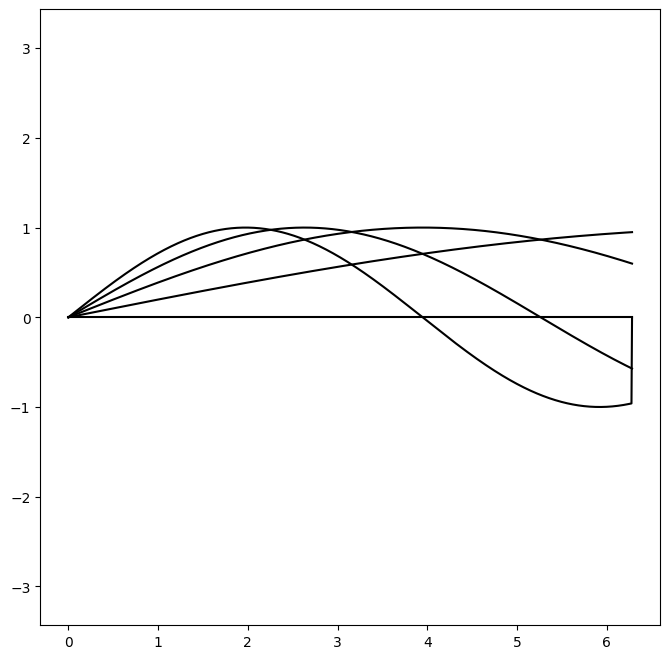

In [4]:
xs = []
ys = []

N = 1000

t = np.linspace(0, 1, N)


for i, a in enumerate(np.linspace(0, 5, 5)):
    alpha = (np.pi * t * 2)
    # r = a/5 * (np.sin(t*np.pi * 2 * (1+a)) + 1) / 2
    r = (np.sin(a*t%5))

    x = alpha
    y = r
    # x = np.cos(alpha) * r
    # y = np.sin(alpha) * r

    xs.append(x)
    ys.append(y)

show(xs, ys)

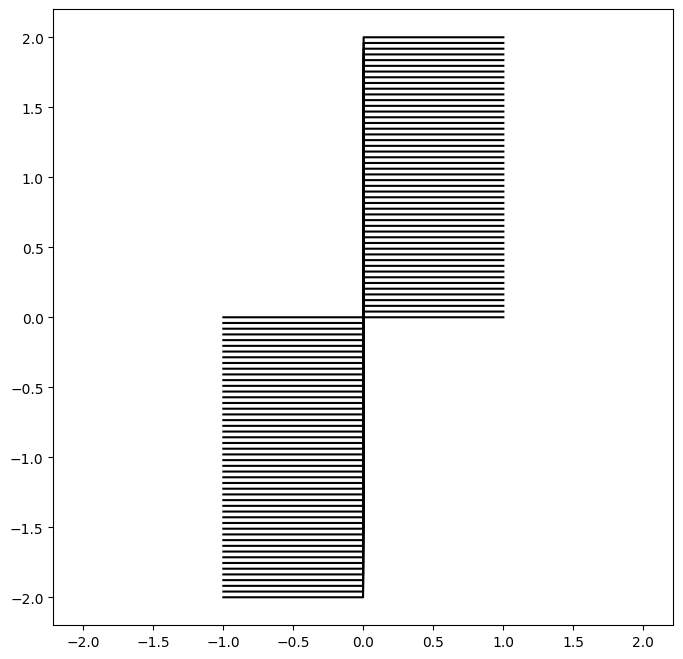

In [ ]:
LINES = 50
RESOLUTION = 500

xs = []
ys = []
# in this for loop :)
# next step you can make some modifications to see what changes
for i, yval in enumerate(np.linspace(-1, 1, LINES)):
    x = np.linspace(-1, 1, RESOLUTION)
    y = np.full_like(x, yval)

    # y += np.sin(x*3*np.pi)*0.1 - np.sin(x*8*np.pi) * 0.003 * i
    # y += np.sin(x*2*np.pi*10*(i/LINES)) * 0.1

    # clean slate

    # so we have even lines. let's make them less even somehow
    # I want them go up and down. so I wanna add something to the y value of the line
    # to make it not constant
    # that should probably depend on the x position so it's basically a function graph
    # amplitude of 0.1 ish would work well


    # y += np.sin(np.cos(np.tan(x))) + np.sin(np.cos(np.tan(y)))

    # # like this one! u like it? :3
    # y = np.sin(np.cos(np.tan(x))) + np.sin(np.cos(np.tan(y)))

    #a = 0.7
    #b = 1.5*(i/LINES)+0.5
    #y += sum([a**k * np.cos(b**k*np.pi*x*3) for k in range(30)]) * (1-a) * 0.3

    y += np.sign(x)

    xs.append(x)
    ys.append(y)

show(xs, ys)

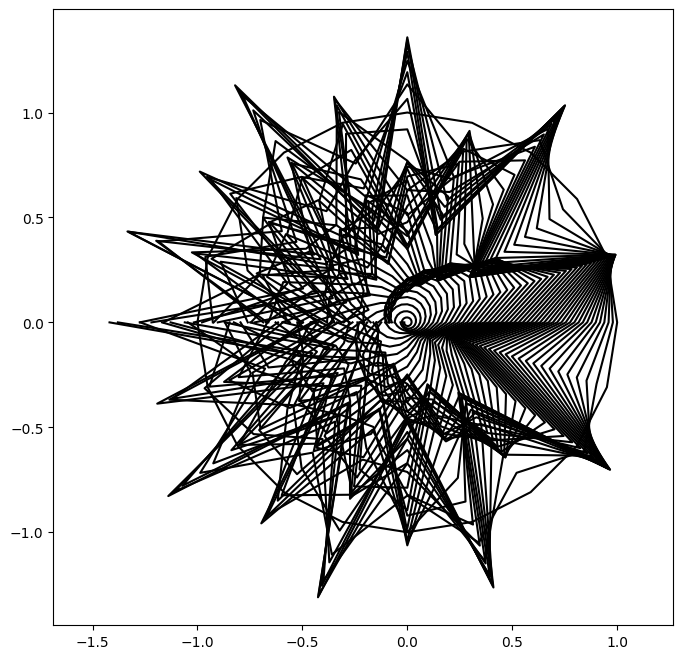

In [ ]:
N = 50
K = 21
M = 5


xs = []
ys = []
for i, r0 in enumerate(np.linspace(0, 1, N)):
    # alpha = np.linspace(-np.pi*0.95, np.pi*0.95, K)
    alpha = np.linspace(-np.pi, np.pi, K)
    r = r0 * (1 + 0.5*np.sin(2*alpha * M*r0))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    xs.append(x)
    ys.append(y)

show(xs, ys)
save(xs, ys, "sierra00")


size: 241.8952949925746 266.84764734911414


<ipython-input-6-4f9652f67ca7>:11: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


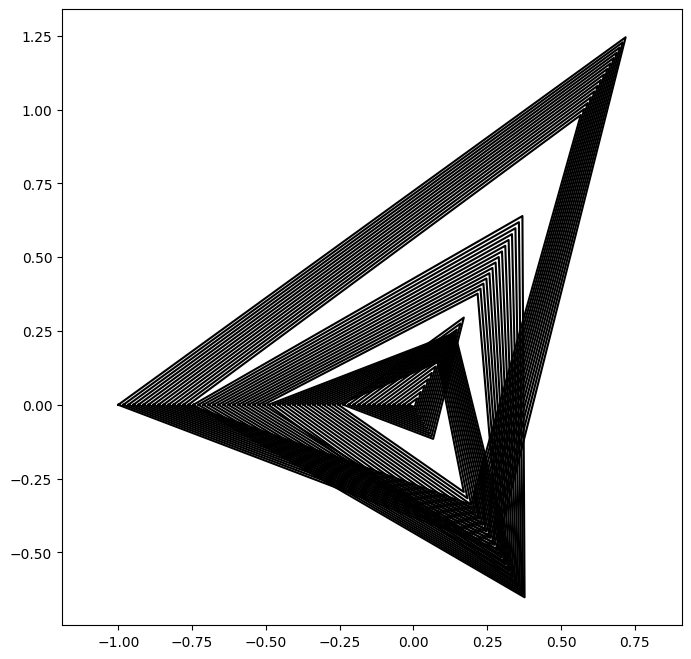

size: 171.89126617637118 189.73664225796932


In [ ]:
N = 60#80
K = 4#21
M = 4#10
L = N//M


alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.1


xs = []
ys = []
for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    xs.append(x)
    ys.append(y)




show(xs, ys)
save(xs, ys, "sierra07")


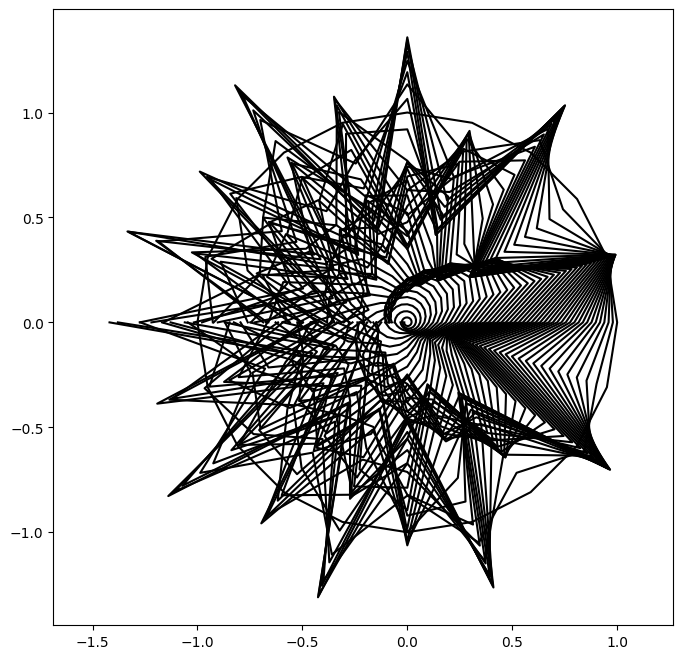

size: 241.8952949925746 266.84764734911414


In [ ]:
N = 50
K = 21
M = 5


xs = []
ys = []
R = 10
for i, r0 in enumerate(np.linspace(0, 1, N)):
    # alpha = np.linspace(-np.pi*0.95, np.pi*0.95, K)
    alpha = np.linspace(-np.pi, np.pi, K)
    r = r0 * (1 + 0.5*np.sin(2*alpha * M*r0))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    xs.append(x)
    ys.append(y)

show(xs, ys)
save(xs, ys, "sierra00")


xs: [array([-0.,  0.,  0.,  0., -0.]), array([-4.77670901e-01,  2.92489070e-17,  3.33333333e-01,  1.15726530e-17,
       -1.88995766e-01]), array([-3.77991532e-01,  5.84978140e-17,  6.66666667e-01,  2.31453060e-17,
       -9.55341801e-01]), array([-1.000000e+00,  6.123234e-17,  1.000000e+00,  6.123234e-17,
       -1.000000e+00])]
ys: [array([-0., -0.,  0.,  0.,  0.]), array([-5.84978140e-17, -4.77670901e-01,  0.00000000e+00,  1.88995766e-01,
        2.31453060e-17]), array([-4.62906120e-17, -9.55341801e-01,  0.00000000e+00,  3.77991532e-01,
        1.16995628e-16]), array([-1.2246468e-16, -1.0000000e+00,  0.0000000e+00,  1.0000000e+00,
        1.2246468e-16])]


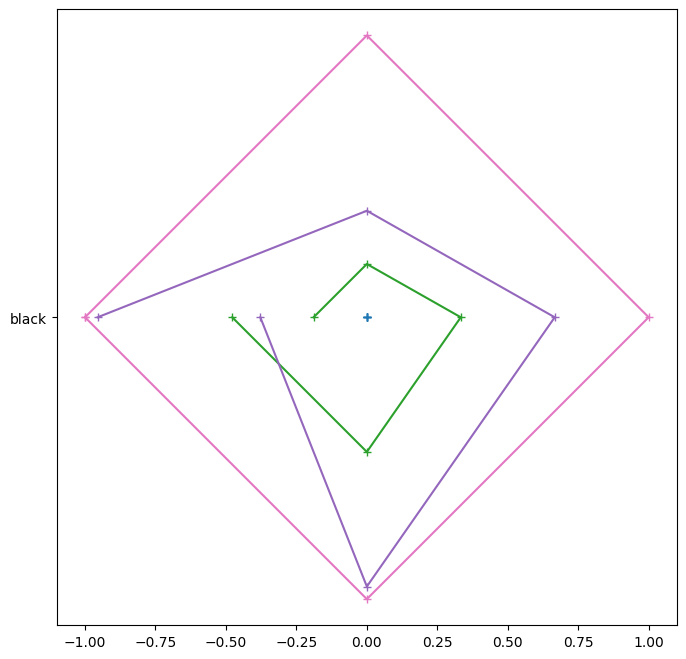

size: 200.00000000000009 200.0


In [38]:
N = 4
K = 5
M = 5

xs = []
ys = []
R = rot_mat(180)xs = []
ys = []
    ys.append(y)
    # ys.append(y1)
print(f"xs: {xs}")
print(f"ys: {ys}")    

show(xs, ys)
save(xs, ys, "sierra_raute_faat")


<ipython-input-9-496daf9b9a88>:15: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


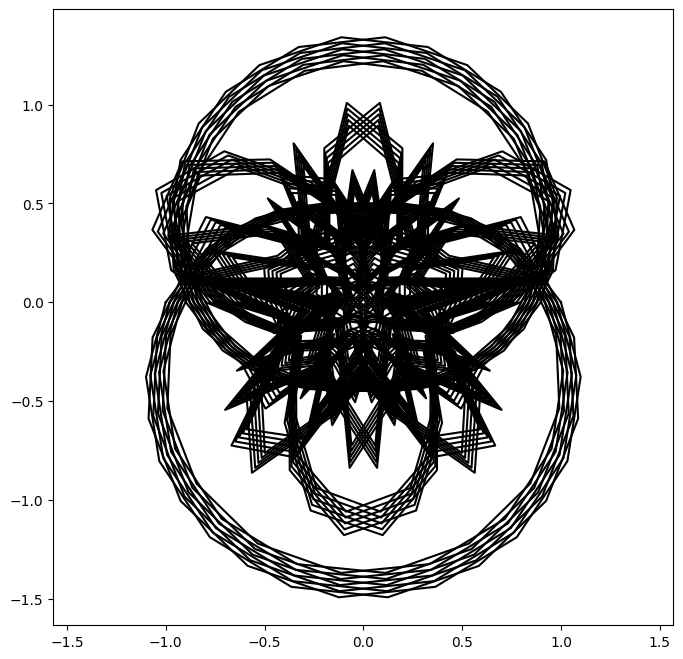

size: 219.957865266327 283.3936585504637


In [ ]:
N = 50#80
K = 20
M = 10
L = N//M

# Define the rotation matrix
theta = np.radians(180)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.01


xs = []
ys = []
for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    x1, y1 =  R @ [x, y]
    xs.append(x)
    xs.append(x1)
    ys.append(y)
    ys.append(-y1)




show(xs, ys)
save(xs, ys, "sierra30")


<ipython-input-10-65bbc942b993>:15: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


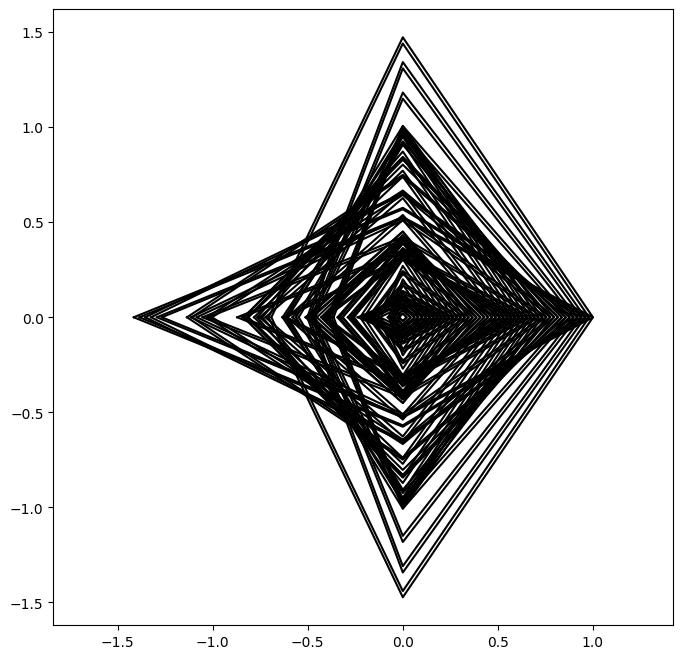

size: 241.53026149578798 294.58552324711377


In [ ]:
N = 50#80
K = 5
M = 20
L = N//M

# Define the rotation matrix
theta = np.radians(180)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.01

xs = []
ys = []
for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major*0.1 + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    x1, y1 =  R @ [x, y]
    xs.append(x)
    xs.append(-x1)
    ys.append(y)
    ys.append(y1)


show(xs, ys)
save(xs, ys, "sierra_raute_01")


<ipython-input-11-804121d8e14d>:17: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


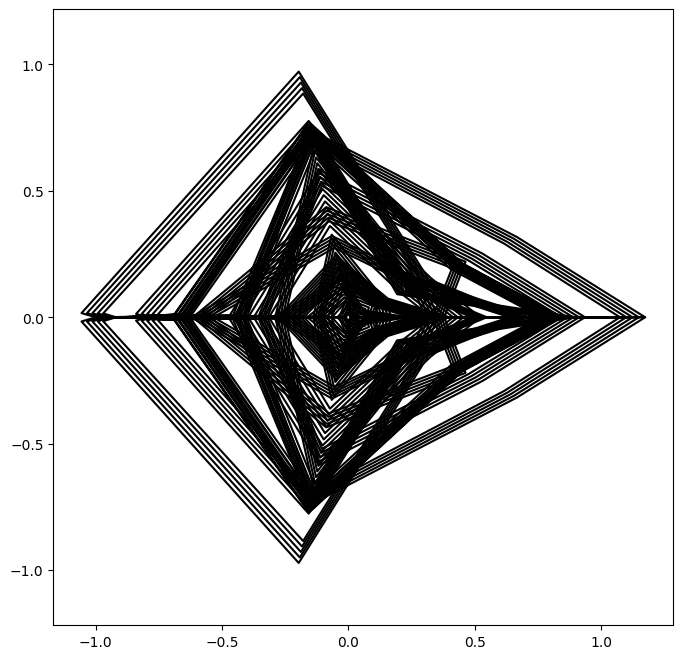

In [ ]:
N = 50#80
K = 10
M = 10
L = N//M

# # Define the rotation matrix
# theta = np.radians(180)
# c, s = np.cos(theta), np.sin(theta)
# R = np.array(((c, -s), (s, c)))

alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.01


xs = []
ys = []
R1 = rot_mat(180)
R2 = rot_mat(60)

for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix)) **0.8
    x, y = r * np.cos(alpha), r*np.sin(alpha) **10
    x1, y1 =  R1 @ [x, y]
    #x2,y2 = R2 @ [x1,y1]
    xs.append(x)
    xs.append(-x1)
    #xs.append(x2)
    ys.append(y)
    ys.append(y1)
    #ys.append(y2)




show(xs, ys)
#save(xs, ys, "sierra37")


<ipython-input-12-e1f8ee9de83b>:17: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


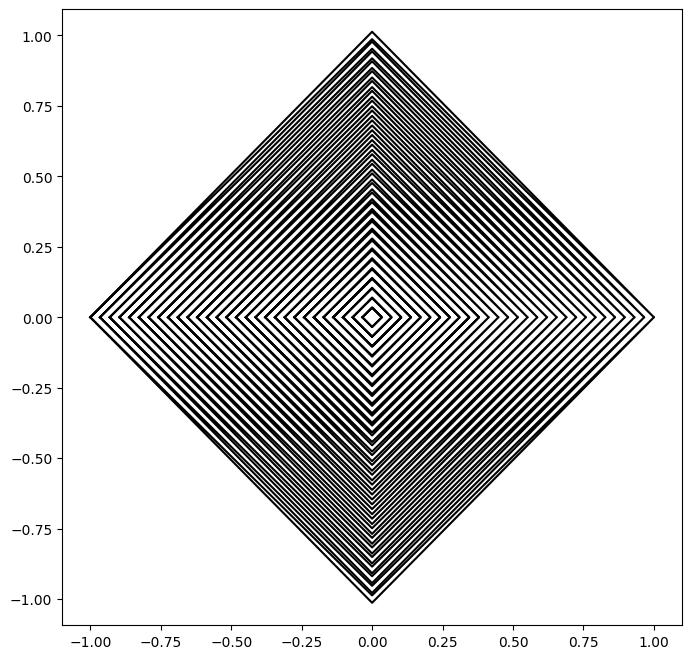

In [ ]:
N = 30#80
K = 5
M = 20
L = N//M

# # Define the rotation matrix
# theta = np.radians(180)
# c, s = np.cos(theta), np.sin(theta)
# R = np.array(((c, -s), (s, c)))



alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.01


xs = []
ys = []
R1 = rot_mat(180)
R2 = rot_mat(180)

for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix)) **0.8
    x, y = r * np.cos(alpha), r*np.sin(alpha) **10
    x1, y1 =  R1 @ [x, y]
    #x2,y2 = R2 @ [x1,y1]
    xs.append(x)
    xs.append(-x1)
    #xs.append(x2)
    ys.append(y)
    ys.append(y1)
    #ys.append(y2)


show(xs, ys)

<ipython-input-13-496daf9b9a88>:15: RuntimeWarning: divide by zero encountered in arctanh
  blend = (np.arctanh(blend)/np.pi*2)


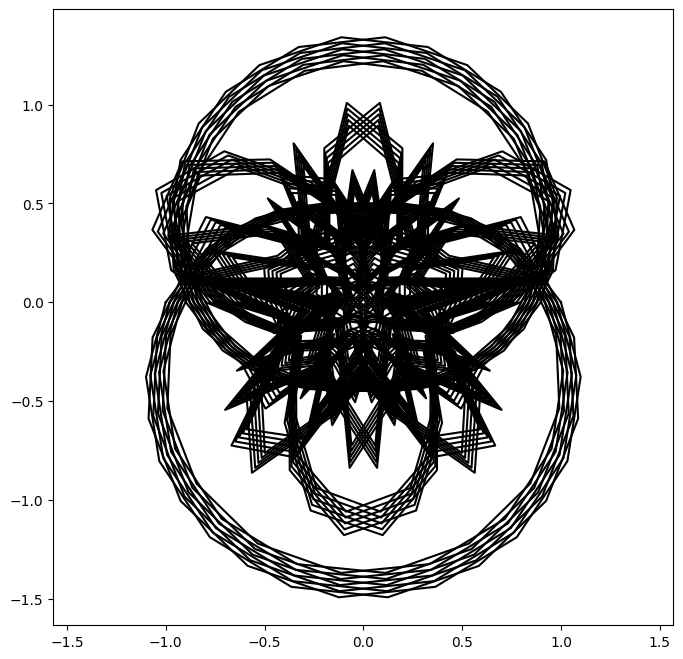

size: 219.957865266327 283.3936585504637


In [ ]:
N = 50#80
K = 20
M = 10
L = N//M

# Define the rotation matrix
theta = np.radians(180)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

alpha = np.linspace(-np.pi, np.pi, K)

blend = np.abs(np.linspace(-1, 1, K))
#blend = np.linspace(-1,1,K)
blend = (np.arctanh(blend)/np.pi*2)
blend[0] = blend[-1] = 1
blend2 = blend**0.01


xs = []
ys = []
for i, r0 in enumerate(np.linspace(0, 1, N)):
    major = i//L
    minor = i%L
    p = minor/L

    mix = major + p + blend2 * (1-p)

    r = r0 * (1 + 0.5*np.sin(2*alpha * mix))
    x, y = r * np.cos(alpha), r*np.sin(alpha)
    x1, y1 =  R @ [x, y]
    xs.append(x)
    xs.append(x1)
    ys.append(y)
    ys.append(-y1)




show(xs, ys)
save(xs, ys, "sierra30")


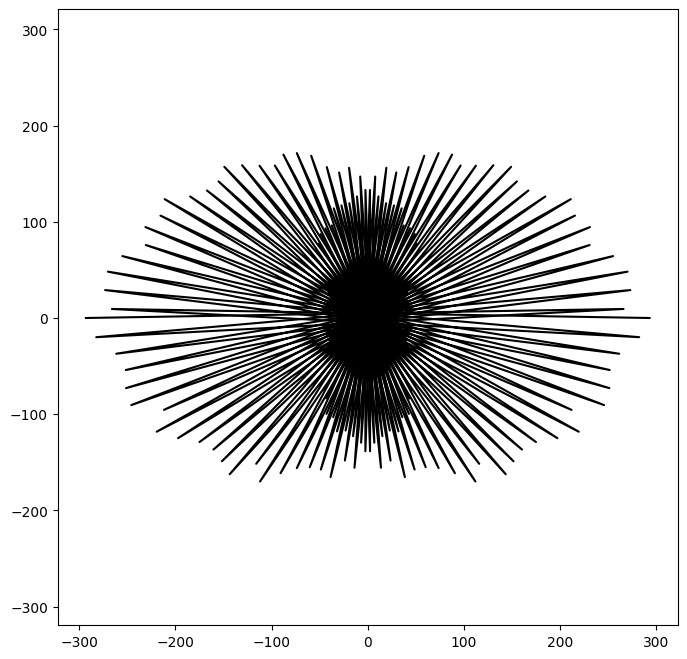

In [ ]:
N = 30
K = 3
M = 10


xs = []
ys = []

t = np.linspace(0, 3*np.pi*N, N*K)
R1 = rot_mat(130)

alpha = t
r = t * (1 + 0.05*np.sin(t * (N + t/K)/N))
x, y = r * np.cos(alpha), r * np.sin(alpha)
x1, y1 =  R @ [x, y]
xs.append(x)
xs.append(x1)

ys.append(y)
ys.append(-y1)

show(xs, ys)
# save(xs, ys, "lobes3")

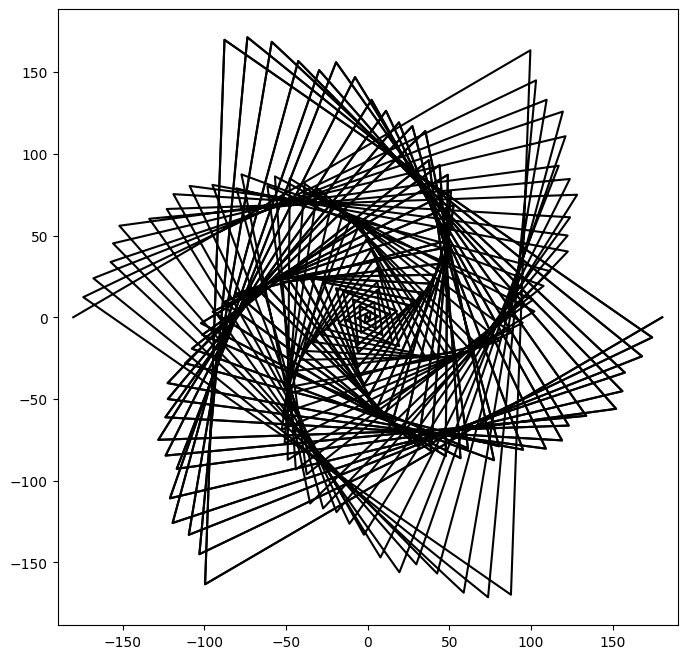

In [ ]:
N = 30
K = 3
M = 10


xs = []
ys = []

t = np.linspace(0, 2*np.pi*N, N*K)
R1 = rot_mat(90)
R2 = rot_mat(90)

alpha = t
r = t * (1 + 0.05*np.sin(t * (N + t/K)/N))

x, y = r * np.cos(alpha), r * np.sin(alpha)
x1, y1 =  R @ [x, y]
x2, y2 = R @ [x1,y1]
xs.append(x)
xs.append(x1)
xs.append(x2)
ys.append(y)
ys.append(y1)
ys.append(y2 )

show(xs, ys)

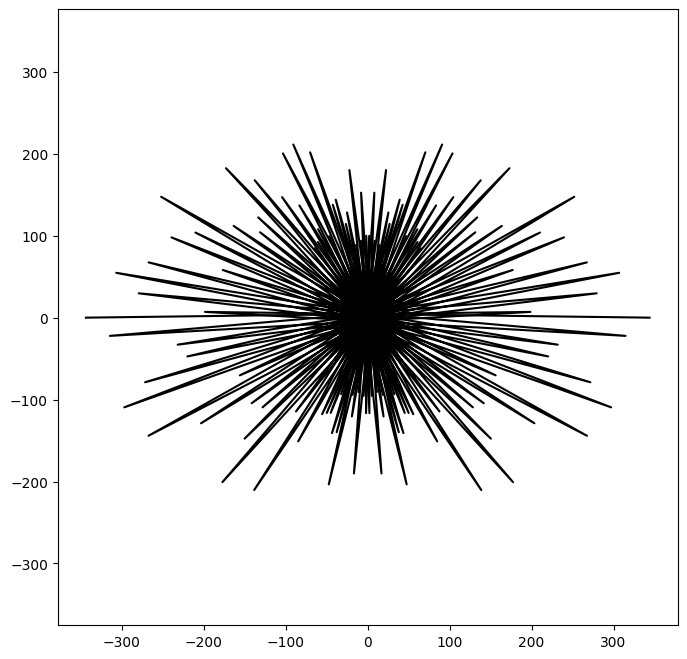

In [ ]:
N = 30
K = 3
M = 10


xs = []
ys = []

t = np.linspace(0, 3*np.pi*N, N*K)
R1 = rot_mat(130)

alpha = t
r = t * (1 + 0.05*np.sin(t * (N + t/K)/N)*(K/0.5))
x, y = r * np.cos(alpha), r * np.sin(alpha)
x1, y1 =  R @ [x, y]
xs.append(x)
xs.append(x1)

ys.append(y)
ys.append(-y1)

show(xs, ys)

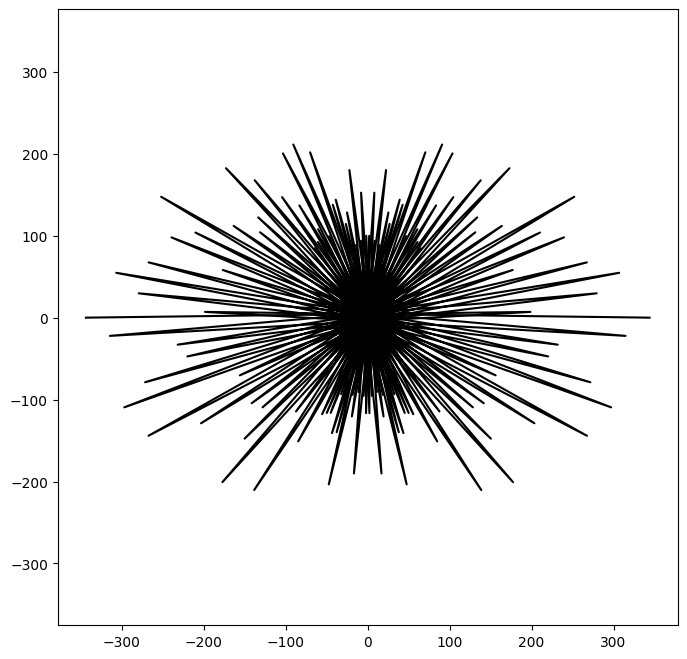

In [ ]:
N = 30
K = 3
M = 10


xs = []
ys = []

t = np.linspace(0, 3*np.pi*N, N*K)
R1 = rot_mat(130)

alpha = t
r = t * (1 + 0.05*np.sin(t * (N + t/K)/N)*(K/0.5))
x, y = r * np.cos(alpha), r * np.sin(alpha)
x1, y1 =  R @ [x, y]
xs.append(x)
xs.append(x1)

ys.append(y)
ys.append(-y1)

show(xs, ys)

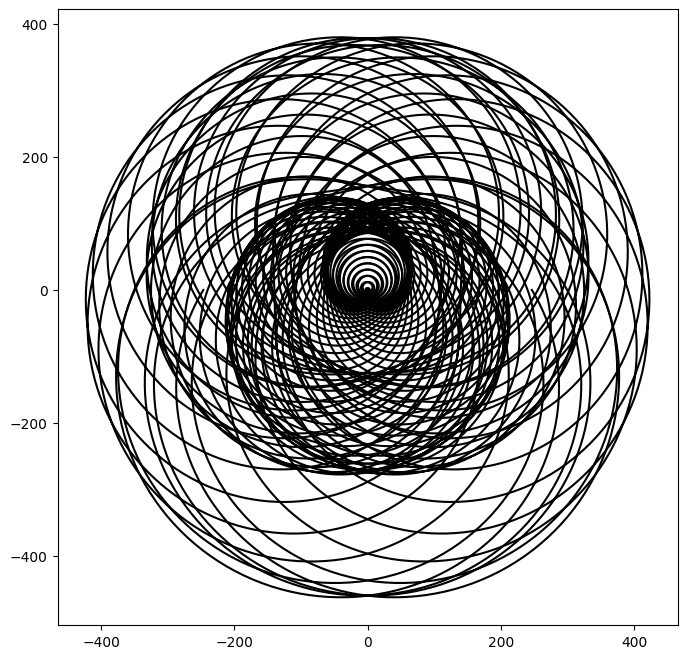

In [ ]:
N = 50
K = 200
M = 5


xs = []
ys = []

t = np.linspace(0, 2*np.pi*N, N*K)
R1 = rot_mat(180)

alpha = t
r = t * (1 + 0.5*np.sin(t * (N + t/K)/N))
x, y = r * np.cos(alpha), r * np.sin(alpha)
x1, y1 =  R @ [x, y]
xs.append(x)
xs.append(x1)
ys.append(y)
ys.append(-y1)
# for i, r0 in enumerate(np.linspace(0, 1, N)):
#     alpha = np.linspace(-np.pi, np.pi, K)
#     r = r0 * (1 + 0.5*np.sin(2*alpha * (N + (M-1)*i)/N))
#     x, y = r * np.cos(alpha), r*np.sin(alpha)
#     xs.append(x)
#     ys.append(y)

show(xs, ys)
# save(xs, ys, "lobes3")

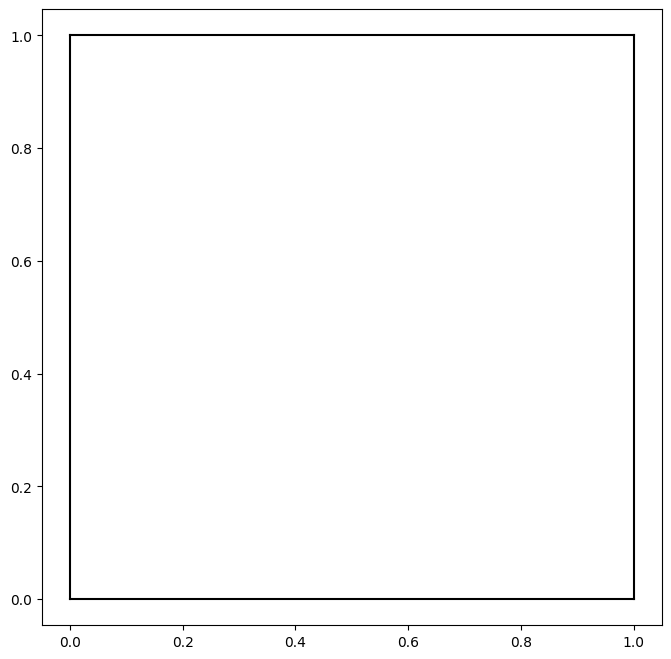

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [23]:
N = 30
K = 5
M = 5


xs = []
ys = []

xs.append((0,0))
ys.append((0,1))

xs.append((1,0))
ys.append((1,1))


xs.append((1,0))
ys.append((0,0))

xs.append((1,1))
ys.append((1,0))

show(xs, ys)
save(xs, ys, "square")